In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()
data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

In [3]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

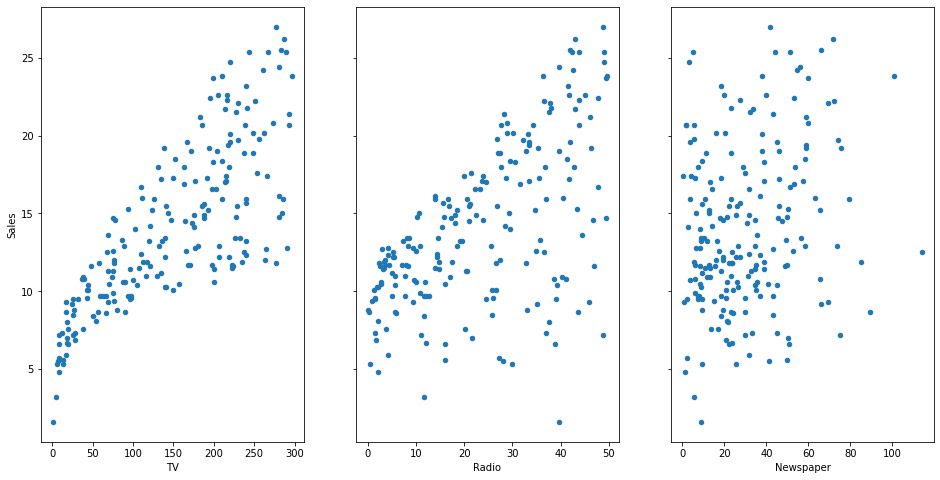

In [4]:
fig, axs = plt.subplots(1,3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax = axs[0], figsize=(16,8))
data.plot(kind='scatter', x='Radio', y='Sales', ax = axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax = axs[2])

In [5]:
feature_cols = ['TV']
x = data[feature_cols]
y = data.Sales

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [7]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [8]:
7.032594+0.047537*50


9.409444

In [9]:
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [10]:
lm.predict(X_new)

array([9.40942557])

In [11]:
X_new = pd.DataFrame({'TV': [data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [12]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

InvalidIndexError: (slice(None, None, None), None)

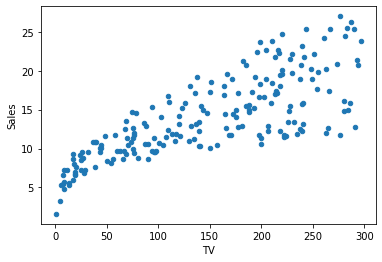

In [13]:
data.plot(kind='scatter', x='TV', y='Sales')
plt.plot(X_new, preds, c='red', linewidth=2)

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

In [ ]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [ ]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
lm.rsquared

0.611875050850071

In [ ]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [ ]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
print(lm.intercept_)
print(lm.coef_)

predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,predictions)))

2.7089490925159065
[0.04405928 0.1992875  0.00688245]
1.9485372043446383


In [ ]:
lm = smf.ols(formula='Sales~TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        15:35:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = smf.ols(formula='Sales~TV+Radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [ ]:
lm = smf.ols(formula='Sales~TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

In [ ]:
import numpy as np
np.random.seed(12345)

nums = np.random.rand(len(data))
mask_large = nums > 0.5;

data['Size'] = 'small'
data.loc[mask_large,'Size']='large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [ ]:
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [ ]:
feature_cols = ['TV', 'Radio', 'Newspaper','IsLarge']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X,y)

zip(feature_cols,lm.coef_)

In [ ]:
np.random.seed(123456)

nums = np.random.rand(len(data))
mask_suburban =(nums > 0.33) & (nums <0.66);
mask_urban = nums>0.66

data['Area'] = 'rural'
data.loc[mask_suburban,'Area']='suburban'
data.loc[mask_urban,'Area']='urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [ ]:
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:,1:]

data=pd.concat([data,area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [ ]:
feature_cols = ['TV', 'Radio', 'Newspaper','IsLarge','Area_suburban','Area_urban']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X,y)

print(feature_cols,lm.coef_)

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
